# Ui-Wing Cheah
## EN 625.633 Module 10 Assignment

In [1]:
import scipy.stats as sp 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# creating a bookeeping class
class BOOTSTRAP(object):
    @staticmethod
    def sample_unparam(src_vec,nB=1,lenB=None,seed=None,*args,**kwargs):
        replace = kwargs.get('replace',True)
        p = kwargs.get('p',None)

        # squeezing into 1d array
        src_vec = src_vec.reshape(-1,)
        if lenB is None:
            lenB = len(src_vec)
        if seed is not None:
            np.random.seed(seed)
        results = np.random.choice(src_vec,size=(nB,lenB),replace=replace,p=p)
        if lenB==1:
            return results.reshape(-1,)
        else:
            return results

    def sample_param(dist_kernel,nB=1,lenB=1,seed=None,*args,**kwargs):
        return dist_kernel.rvs(size=(nB,lenB))


    @classmethod
    def bootstrap_unparam(cls,src_vec,stat_func,nB=1,lenB=None,seed=None,*args,**kwargs):
        if seed is not None:
            np.random.seed(seed)

        samples = cls.sample_unparam(src_vec,nB=nB,lenB=lenB,seed=seed,*args,**kwargs)
        # applying the stat_func
        estimates = stat_func(samples,*args,**kwargs)
        results = {'estimates':pd.Series(data=estimates), 'samples':pd.DataFrame(data=samples)}
        return results

    @classmethod
    def bootstrap_param(cls,dist_kernel,stat_func,nB=1,lenB=None,seed=None,*args,**kwargs):
        if seed is not None:
            np.random.seed(seed)

        samples = cls.sample_param(dist_kernel,nB=nB,lenB=lenB,seed=seed,*args,**kwargs)
        # applying the stat_func
        estimates = stat_func(samples,*args,**kwargs)
        results = {'estimates':pd.Series(data=estimates), 'samples':pd.DataFrame(data=samples)}
        return results


        

### Problem 1

In [6]:
# Problem 1
vec_p1 = np.array([1,2,3.5,4,7.3,8.6,12.4,13.8,18.1])
def trim_mean(data,):
    # sort the 2d array by columns
    data_sort = np.sort(data,axis=1)
    # getting means by truncated a rows
    # truncation done above after removing smallest and largest two
    data_mean = data_sort[:,2:-2].mean(axis=1)
    return data_mean
    
Bdraws = [25,100,200,500,1000,2000]
p1_a = pd.Series({B_: BOOTSTRAP.bootstrap_unparam(vec_p1,trim_mean,nB=B_,)['estimates'].var() for B_ in Bdraws})
print(p1_a)
print(p1_a.to_latex())

25      3.952357
100     7.169392
200     6.445127
500     6.008331
1000    5.417480
2000    5.841884
dtype: float64
\begin{tabular}{lr}
\toprule
{} &         0 \\
\midrule
25   &  3.952357 \\
100  &  7.169392 \\
200  &  6.445127 \\
500  &  6.008331 \\
1000 &  5.417480 \\
2000 &  5.841884 \\
\bottomrule
\end{tabular}



In [7]:
# problem 1b
seeds = range(10)
p1_a = pd.DataFrame({sd_:pd.Series({B_: BOOTSTRAP.bootstrap_unparam(vec_p1,trim_mean,nB=B_,seed=sd_)['estimates'].var() for B_ in Bdraws}) for sd_ in seeds})

print(p1_a)

0         1         2         3         4         5         6  \
25    7.507049  5.111229  4.328189  5.259511  8.398933  6.688917  5.521609   
100   5.907021  5.087147  5.412411  6.063981  5.780060  6.529441  5.436656   
200   6.458322  5.678617  5.409384  5.742557  5.776675  6.421575  5.449272   
500   5.977047  5.556733  5.840899  5.259837  5.820748  5.537881  5.756851   
1000  6.025201  5.482370  5.826263  5.534520  5.837821  5.659563  5.870750   
2000  5.707299  5.875234  5.634684  5.627945  5.681202  5.835545  5.841039   

             7         8         9  
25    7.736600  7.819911  7.481296  
100   8.116023  5.624665  4.865605  
200   7.346583  6.328935  5.347183  
500   6.747246  5.929496  5.746459  
1000  6.214445  5.644855  5.935726  
2000  5.958620  5.568645  5.722104  


### Problem 2

In [8]:
# problem 2
Survival = np.array([25, 42, 45, 46, 51, 103, 124, 146, 340, 396, 412, 879, 1112])
Bsamp = 1000
# part (a)
surv_mean = lambda amat: amat.mean(axis=1)
p2a_samples = BOOTSTRAP.bootstrap_unparam(np.log(Survival),surv_mean,nB=Bsamp,seed=100)
mean_surv = np.exp(p2a_samples['estimates'].mean())
conf_int_lo = np.exp(p2a_samples['estimates'].quantile(0.025))
conf_int_hi = np.exp(p2a_samples['estimates'].quantile(0.975))
print('Mean Survival:{0:.2f}, conf_interval:({1:.2f},{2:.2f})'.format(mean_surv,conf_int_lo,conf_int_hi))

Mean Survival:146.08, conf_interval:(75.24,276.16)


In [9]:
# problem 2b
Bsamp = 1000
# part (b)
p2b_samples = BOOTSTRAP.bootstrap_unparam(Survival,surv_mean,nB=Bsamp,seed=100)
mean_surv = p2b_samples['estimates'].mean()
conf_int_lo = p2b_samples['estimates'].quantile(0.025)
conf_int_hi = p2b_samples['estimates'].quantile(0.975)
print('Mean Survival:{0:.2f}, conf_interval:({1:.2f},{2:.2f})'.format(mean_surv,conf_int_lo,conf_int_hi))

Mean Survival:288.95, conf_interval:(130.83,472.61)


### Problem 3

In [10]:
# 3(b)
theta = 0.8
dist_3b = sp.uniform(loc=0,scale=theta)
Bsamps = [100,200,500,1000,2000]
sample_max = lambda amat: np.max(amat,axis=1)
#parameteric
p3b_param = pd.Series({B_: BOOTSTRAP.bootstrap_param(dist_3b,sample_max,nB=B_,lenB=10,seed=100)['estimates'].mean() for B_ in Bsamps})


In [11]:
print(p3b_param)

100     0.724668
200     0.724045
500     0.725717
1000    0.727962
2000    0.727631
dtype: float64


### Problem 4

In [63]:
# illustrate by sampling the following
# vector = [1,2,3,4,5]
# 1000 bootstraps
p4_vec = np.array([1,2,3,4,5])
p4_samples = BOOTSTRAP.sample_unparam(p4_vec,nB=10000,seed=102) 

# get the number of 3's
num_1 = np.sum(p4_samples==1,axis=1)
num_2 = np.sum(p4_samples==2,axis=1)
num_3 = np.sum(p4_samples==3,axis=1)
num_4 = np.sum(p4_samples==4,axis=1)
num_5 = np.sum(p4_samples==5,axis=1)

# create plot
rvs = sp.binom(n=5,p=1/5).rvs(size=10000)
def create_plot(vars,title = ''):
    ax_=sns.distplot(vars,kde=False,label='Bootstrap',)
    ax_ = sns.distplot(rvs,kde=False,ax=ax_,label='Binom')
    ax_.legend()
    ax_.set_ylabel('Frequency')
    ax_.set_ylabel('x')
    ax_.set_title(title)
    return ax_
    


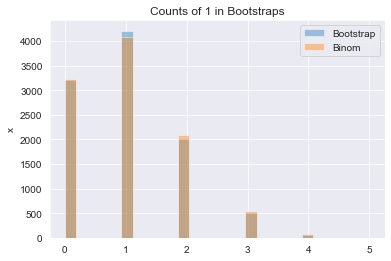

In [65]:
sns.set_style('darkgrid')
ax1 = create_plot(num_1,'Counts of 1 in Bootstraps')


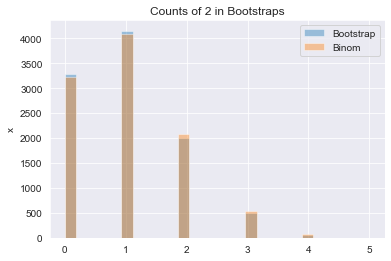

In [66]:
ax2 = create_plot(num_2,'Counts of 2 in Bootstraps')


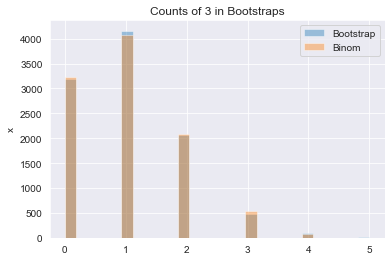

In [67]:
ax3 = create_plot(num_3,'Counts of 3 in Bootstraps')

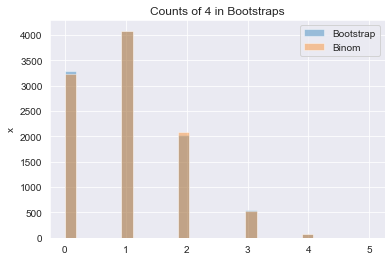

In [68]:
ax4 = create_plot(num_4,'Counts of 4 in Bootstraps')


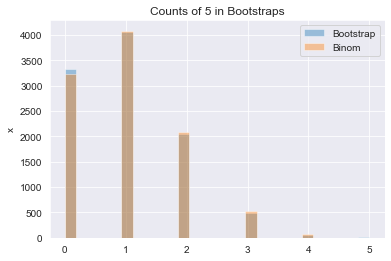

In [69]:
ax5 = create_plot(num_5,'Counts of 5 in Bootstraps')
